In [37]:
import csv
import numpy as np

In [2]:
# upload data using csv module
# data structure as list of dict => access data via <keys>
#-----------------------------------------------------------
data = []
with open("ESP_PUBLIC.IDENTITE_ARBRE.csv") as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        data.append(dict(row))

In [3]:
# print all keys (column names)
#-----------------------------------------
[key for (key, values) in data[0].items()]

['ELEM_POINT_ID',
 'CODE',
 'NOM',
 'GENRE',
 'GENRE_DESC',
 'CATEGORIE',
 'CATEGORIE_DESC',
 'SOUS_CATEGORIE',
 'SOUS_CATEGORIE_DESC',
 'CODE_PARENT',
 'CODE_PARENT_DESC',
 'ADR_SECTEUR',
 'BIEN_REFERENCE',
 'GENRE_BOTA',
 'ESPECE',
 'VARIETE',
 'STADEDEDEVELOPPEMENT',
 'EQUIPE',
 'REMARQUES',
 'ANNEEDEPLANTATION',
 'RAISONDEPLANTATION',
 'TRAITEMENTCHENILLES',
 'COURRIER',
 'IDENTIFIANTPLU',
 'TYPEIMPLANTATIONPLU',
 'INTITULEPROTECTIONPLU',
 'ANNEEABATTAGE',
 'ESSOUCHEMENT',
 'DIAMETREARBRE',
 'CAUSEABATTAGE',
 'COLLECTIVITE',
 'GeoJSON']

In [4]:
# print all 'genres botaniques'
#-------------------------------------
genres_botanique = [item['GENRE_BOTA'] for item in data]

#### count the numbers of genres => 3 VARIANTS

In [5]:
# using dict as data type:
#-------------------------------
dict_genres = {}
for genre in genres_botanique:
    if genre not in dict_genres:
        dict_genres[genre] = 1
    else:
        dict_genres[genre] += 1

In [6]:
# count via the numbers of key
# one key == ''!!
#----------------------------------------
number_of_genres = len([key for (key, value) in dict_genres.items()])
print(f"Le numero des 'genres botaniques' a Grenoble est: {number_of_genres - 1}")

Le numero des 'genres botaniques' a Grenoble est: 119


In [7]:
# using the list data type
# transfer to set (only unique items.)
#--------------------------
len(set(genres_botanique)) - 1

119

In [8]:
# iterate over list and append in unique_list
#---------------------------------------------
genres_botanique_unique = []
for item in genres_botanique:
    if item not in genres_botanique_unique:
        genres_botanique_unique.append(item)
print(f"Le numero des 'genres botaniques' a Grenoble est: {len(genres_botanique_unique) - 1}")

Le numero des 'genres botaniques' a Grenoble est: 119


### Result: 119 'genres botaniques'

In [ ]:
import timeit
# test code perfromance via function with list as parameter....
#---------------------------------------------------------------

def dictionary(liste):
    dict_genres = {}
    for genre in liste:
        if genre not in dict_genres:
            dict_genres[genre] = 1
        else:
            dict_genres[genre] += 1
    number_of_genres = len([key for (key, value) in dict_genres.items()]) - 1
    return number_of_genres

            
def set_approach(liste):
    return len(set(liste)) - 1

    
def list_iteration(liste):
    genres_botanique_unique = []
    for item in liste:
        if item not in genres_botanique_unique:
            genres_botanique_unique.append(item)
    return (len(genres_botanique_unique) - 1)

methods = [dictionary, set_approach, list_iteration]
methods_str = ["dictionary", "set_approach", "list_iteration"]

times = []
results = []
for method in methods:
    start = timeit.timeit()
    result = method(genres_botanique)
    end = timeit.timeit()
    times.append(end - start)
    results.append(result)

# Result:
#-------------------------------------------------

print("Perfromance of method:")    
for i in range(len(times)):    
    print("{} // result: {} time: {}".format(methods_str[i], results[i], times[i]))

In [9]:
# print 'les espèces différentes'
# zipp the list of genres and especes in a tuple
# join the string if lenght > 1 with ' '
#-------------------------------------
espece_arbres = list(zip(genres_botanique, [item['ESPECE'] for item in data]))

# using list-comprehension
#-------------------------------------
espece_arbres_tout = [' '.join(x) if x[1] != '' else x[0] for x in espece_arbres]
espace_pure = [' '.join(x) for x in espece_arbres if x[1] != '']

In [10]:
# number of species known or accessable:
#-------------------
dict_especes = {}
for espece in espace_pure:
    if espece not in dict_especes:
        dict_especes[espece] = 1
    else:
        dict_especes[espece] += 1
print(f"le numero des expeces differentes: {len([key for (key, value) in dict_especes.items()])}")

le numero des expeces differentes: 339


In [11]:
len(set(espace_pure))

339

### Result: 339 'les espèces différentes'

### ---------------------------------------------------------------------------------------------------

In [23]:
# Listez tous les représentants uniques de leurs genre botanique
genre_espece = [(key.split(' '))[0] for (key, value) in dict_especes.items()]

In [29]:
genre_espece[:3]

['Fraxinus', 'Carpinus', 'Alnus']

In [24]:
dict_genre_especes = {}
for espece in genre_espece:
    if espece not in dict_genre_especes:
        dict_genre_especes[espece] = 1
    else:
        dict_genre_especes[espece] += 1

In [26]:
unique = [key for (key, value) in dict_genre_especes.items() if dict_genre_especes[key] == 1 ]

In [28]:
len(unique)

71

In [30]:
espece_sep = [(key.split(' ')) for (key, value) in dict_especes.items()]

In [31]:
espece_sep[:3]

[['Fraxinus', 'excelsior'], ['Carpinus', 'betulus'], ['Alnus', 'cordata']]

In [32]:
unique_espece = []

for item in espece_sep:
    if item[0] in unique:
        unique_espece.append(' '.join(item))

In [33]:
len(unique_espece)

71

In [38]:
np.array(sorted(unique_espece))

array(['Acacia dealbata', 'Ailanthus altissima', 'Albizia julibrissin',
       'Araucaria araucana', 'Broussonetia papyrifera',
       'Buxus sempervirens', 'Calocedrus decurrens', 'Carya ovalis',
       'Castanea sativa', 'Catalpa bignonoides',
       'Cephalotaxus harringtonia', 'Cercidiphyllum japonicum',
       'Chimonanthus praecox', 'Chitalpa tashkentensis',
       'Clerodendron tricotonum', 'Cotinus coggygria',
       'Cryptomeria japonica', 'Cupressocyparis leylandii',
       'Davidia involucrata', 'Eleagnus angustifolia',
       'Eriobotrya  japonica', 'Eucalyptus gunii', 'Euodia daniellii',
       'Fagus sylvatica', 'Ficus carica', 'Fontanesia phillyreoides',
       'Ginkgo biloba', 'Gleditsia triacanthos', 'Gymnocladus dioicus',
       'Hibiscus syriacus', 'Hovenia dulcis', 'Idesia polycarpa',
       'Ilex aquifolium', 'Koelreuteria paniculata',
       'Laburnum anagyroides', 'Lagerstroemia indica', 'Larix decidua',
       'Laurus nobilis', 'Libocedrus decurrens',
       'Li

In [12]:
#Quels sont les genres botaniques les plus représentés ?
# transform dict in list and sort
# show the most common genres
#---------------------------------------------------------
common_genres = sorted([(value, key) for (key, value) in dict_genres.items()], reverse=True)[:10]

print("The 10 most common genres in Grenoble:\ngenre: \t number:")
for i in range(len(common_genres)):
    print("{:10} {}".format(common_genres[i][1], common_genres[i][0]))

The 10 most common genres in Grenoble:
genre: 	 number:
Acer       5260
Platanus   4615
Pinus      2075
Tilia      1776
Fraxinus   1515
Carpinus   1324
Betula     1218
Prunus     1170
Populus    911
Alnus      816


In [39]:
# total number of trees
#-----------------------
trees_total = sum([values for (key, values) in dict_genres.items()])
trees_total

31892

In [40]:
common_genres_percent = sorted([(round((value / trees_total) * 100, 2), key) for (key, value) in dict_genres.items()], 
                               reverse=True)[:10]

In [41]:
print("The 10 most common genres in Grenoble:\ngenre: \t percent:")
for i in range(len(common_genres_percent)):
    print("{:10} {}".format(common_genres_percent[i][1], common_genres_percent[i][0]))

The 10 most common genres in Grenoble:
genre: 	 percent:
Acer       16.49
Platanus   14.47
Pinus      6.51
Tilia      5.57
Fraxinus   4.75
Carpinus   4.15
Betula     3.82
Prunus     3.67
Populus    2.86
Alnus      2.56


In [42]:
trees_total = sum([values for (key, values) in dict_especes.items()])
trees_total

29710

In [43]:
common_especes = sorted([(value, key) for (key, value) in dict_especes.items()], reverse=True)[:10]

print("The 10 most common especes in Grenoble:\n{:30}{}".format("espece", "number"))
for i in range(len(common_especes)):
    print("{:30} {}".format(common_especes[i][1], common_especes[i][0]))

The 10 most common especes in Grenoble:
espece                        number
Platanus acerifolia            4008
Acer pseudoplatanus            1337
Pinus nigra                    1325
Carpinus betulus               1303
Acer platanoides               1097
Tilia tomentosa                968
Acer campestre                 909
Liquidambar styraciflua        803
Fraxinus excelsior             791
Betula verrucosa               548


In [58]:
common_especes_percent = sorted([(round((value / 31892) * 100, 2), key) for (key, value) in dict_especes.items()], 
                               reverse=True)[:10]

In [59]:
print("The 10 most common especes in Grenoble:\n{:30}{}".format("espece", "percent"))
for i in range(len(common_especes_percent)):
    print("{:30} {}".format(common_especes_percent[i][1], common_especes_percent[i][0]))

The 10 most common especes in Grenoble:
espece                        percent
Platanus acerifolia            12.57
Acer pseudoplatanus            4.19
Pinus nigra                    4.15
Carpinus betulus               4.09
Acer platanoides               3.44
Tilia tomentosa                3.04
Acer campestre                 2.85
Liquidambar styraciflua        2.52
Fraxinus excelsior             2.48
Betula verrucosa               1.72


In [46]:
# the 10 top most genres for accumulating years from 1924 - 2019
# include trees that are removed => 

In [47]:
for item in data:
    if item['ANNEEABATTAGE'] == '':
        item['ANNEEABATTAGE'] = '2020'
    

In [48]:
year_planting = (sorted([item['ANNEEDEPLANTATION'] for item in data if item['ANNEEDEPLANTATION'] != '']))

In [49]:
years_planting_order = sorted(list(set(year_planting)))

In [50]:
data_accum_genre = []
dict_years_genre = {}

for y in years_planting_order:
    for item in data:
        if item['ANNEEDEPLANTATION'] == y and item['ANNEEABATTAGE'] > y:
            data_accum_genre.append(item)
    genres = [item['GENRE_BOTA'] for item in data_accum_genre if item['GENRE_BOTA'] != '']
    dict_y_genre = {}
    for genre in genres:
        if genre not in dict_y_genre:
            dict_y_genre[genre] = 1
        else:
            dict_y_genre[genre] += 1
    total = sum([values for (key, values) in dict_y_genre.items()])
    result = sorted([(round((value / total) * 100, 2)) for (key, value) in dict_y_genre.items()], reverse=True)[:5]
    dict_years_genre.update({y:result})    

In [51]:
result_genre = [values for (key, values) in dict_years_genre.items()]

In [53]:
result_genre[:2]

[[25.0, 16.67, 8.33, 8.33, 8.33], [69.23, 7.69, 5.13, 2.56, 2.56]]

In [54]:
data_accum_espece = []
dict_years_espece = {}

for y in years_planting_order:
    for item in data:
        if item['ANNEEDEPLANTATION'] == y and item['ANNEEABATTAGE'] > y:
            data_accum_espece.append(item)
    genres = [item['GENRE_BOTA'] for item in data_accum_espece if item['GENRE_BOTA'] != '']
    espece_arbres = list(zip(genres, [item['ESPECE'] for item in data_accum_espece]))
    espece_pure = [' '.join(x) for x in espece_arbres if x[1] != '']
    
    dict_y_espece = {}
    for espece in espece_pure:
        if espece not in dict_y_espece:
            dict_y_espece[espece] = 0
        else:
            dict_y_espece[espece] += 1
    total = sum([values for (key, values) in dict_y_espece.items()])
    result = sorted([(round((value / total) * 100, 2)) for (key, value) in dict_y_espece.items()], reverse=True)[:5]
    dict_years_espece.update({y:result})    

In [55]:
result_especes = [values for (key, values) in dict_years_espece.items()]

In [56]:
import matplotlib.pyplot as plt

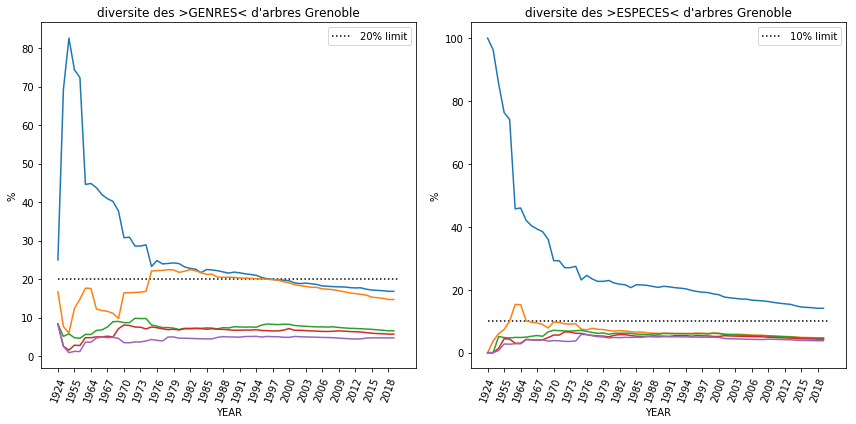

In [57]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(years_planting_order, result_genre)
plt.ylabel('%')
plt.xlabel('YEAR')
plt.title("diversite des >GENRES< d'arbres Grenoble")
plt.hlines(20,0, len(years_planting_order), colors='k', linestyles='dotted', label='20% limit')
plt.xticks(years_planting_order[::3], rotation=70)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(years_planting_order, result_especes)
plt.ylabel('%')
plt.xlabel('YEAR')
plt.title("diversite des >ESPECES< d'arbres Grenoble")
plt.hlines(10,0, len(years_planting_order), colors='k', linestyles='dotted', label='10% limit')
plt.xticks(years_planting_order[::3], rotation=70)
plt.legend()

plt.tight_layout()

plt.show()